In [316]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import plotly.express as px

In [318]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [319]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [320]:
import statsmodels.api as sm

In [321]:
from scipy.stats import binom, poisson

In [322]:
from scipy.stats import norm

In [323]:
from scipy.special import comb

In [324]:
pop_df = pd.read_csv("population.csv")

In [436]:
pop_df

,Year,Population,Births,Deaths,Natural_Increase,Immigrants,Emigrants,Net_Migration,Population_Change,UNIT
36,1987,3546.5,61.2,32.2,29.0,17.2,40.2,-23.0,5.9,Thousand
37,1988,3530.7,57.8,31.6,26.2,19.2,61.1,-41.9,-15.8,Thousand
38,1989,3509.5,53.6,31.0,22.6,26.7,70.6,-43.9,-21.2,Thousand
39,1990,3505.8,51.9,32.8,19.1,33.3,56.3,-22.9,-3.7,Thousand
40,1991,3525.7,53.1,31.1,22.0,33.3,35.3,-2.0,19.9,Thousand
41,1992,3554.5,52.8,31.4,21.4,40.7,33.4,7.4,28.8,Thousand
42,1993,3574.1,50.4,30.4,20.0,34.7,35.1,-0.4,19.6,Thousand
43,1994,3585.9,49.1,32.6,16.6,30.1,34.8,-4.7,11.8,Thousand
44,1995,3601.3,48.4,31.2,17.2,31.2,33.1,-1.9,15.4,Thousand
45,1996,3626.1,48.8,32.0,16.7,39.2,31.2,8.0,24.8,Thousand


In [437]:
pop_df.head()

,Year,Population,Births,Deaths,Natural_Increase,Immigrants,Emigrants,Net_Migration,Population_Change,UNIT
36,1987,3546.5,61.2,32.2,29.0,17.2,40.2,-23.0,5.9,Thousand
37,1988,3530.7,57.8,31.6,26.2,19.2,61.1,-41.9,-15.8,Thousand
38,1989,3509.5,53.6,31.0,22.6,26.7,70.6,-43.9,-21.2,Thousand
39,1990,3505.8,51.9,32.8,19.1,33.3,56.3,-22.9,-3.7,Thousand
40,1991,3525.7,53.1,31.1,22.0,33.3,35.3,-2.0,19.9,Thousand


In [438]:
print(pop_df.head())

    Year  Population  Births  Deaths  Natural_Increase  Immigrants  Emigrants  \
36  1987      3546.5    61.2    32.2              29.0        17.2       40.2   
37  1988      3530.7    57.8    31.6              26.2        19.2       61.1   
38  1989      3509.5    53.6    31.0              22.6        26.7       70.6   
39  1990      3505.8    51.9    32.8              19.1        33.3       56.3   
40  1991      3525.7    53.1    31.1              22.0        33.3       35.3   

    Net_Migration  Population_Change      UNIT  
36          -23.0                5.9  Thousand  
37          -41.9              -15.8  Thousand  
38          -43.9              -21.2  Thousand  
39          -22.9               -3.7  Thousand  
40           -2.0               19.9  Thousand  


In [439]:
pop_df.tail()

,Year,Population,Births,Deaths,Natural_Increase,Immigrants,Emigrants,Net_Migration,Population_Change,UNIT
68,2019,4958.5,60.5,30.9,29.6,97.1,53.1,44.0,73.6,Thousand
69,2020,5029.9,59.1,32.4,26.7,95.6,50.9,44.7,71.4,Thousand
70,2021,5074.7,57.3,34.3,23.0,74.1,52.3,21.8,44.8,Thousand
71,2022,5184.0,59.7,33.6,26.1,107.8,56.1,51.7,77.8,Thousand
72,2023,5281.6,55.5,35.5,20.0,141.6,64.0,77.6,97.6,Thousand


In [440]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 36 to 72
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               37 non-null     int64  
 1   Population         37 non-null     float64
 2   Births             37 non-null     float64
 3   Deaths             37 non-null     float64
 4   Natural_Increase   37 non-null     float64
 5   Immigrants         37 non-null     float64
 6   Emigrants          37 non-null     float64
 7   Net_Migration      37 non-null     float64
 8   Population_Change  37 non-null     float64
 9   UNIT               37 non-null     object 
dtypes: float64(8), int64(1), object(1)
memory usage: 3.2+ KB


In [441]:
pop_df.dtypes

Year                   int64
Population           float64
Births               float64
Deaths               float64
Natural_Increase     float64
Immigrants           float64
Emigrants            float64
Net_Migration        float64
Population_Change    float64
UNIT                  object
dtype: object

In [442]:
pop_df.describe()

,Year,Population,Births,Deaths,Natural_Increase,Immigrants,Emigrants,Net_Migration,Population_Change
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2005.000000,4206.608108,60.105405,30.651351,29.443243,65.405405,48.459459,16.937838,46.383784
std,10.824355,575.151783,8.080462,1.975070,9.450031,32.716840,18.520371,34.750950,35.901095
min,1987.000000,3505.800000,48.400000,27.000000,16.600000,17.200000,25.300000,-43.900000,-21.200000
25%,1996.000000,3626.100000,53.600000,28.900000,21.500000,40.700000,31.500000,-4.700000,20.100000
50%,2005.000000,4133.800000,59.700000,31.000000,28.800000,59.000000,49.200000,17.300000,42.300000
75%,2014.000000,4645.400000,65.400000,32.000000,35.600000,84.600000,64.000000,41.300000,71.300000
max,2023.000000,5281.600000,77.200000,35.500000,48.800000,151.100000,83.000000,104.800000,142.900000


In [443]:
print(pop_df.describe())

              Year   Population     Births     Deaths  Natural_Increase  \
count    37.000000    37.000000  37.000000  37.000000         37.000000   
mean   2005.000000  4206.608108  60.105405  30.651351         29.443243   
std      10.824355   575.151783   8.080462   1.975070          9.450031   
min    1987.000000  3505.800000  48.400000  27.000000         16.600000   
25%    1996.000000  3626.100000  53.600000  28.900000         21.500000   
50%    2005.000000  4133.800000  59.700000  31.000000         28.800000   
75%    2014.000000  4645.400000  65.400000  32.000000         35.600000   
max    2023.000000  5281.600000  77.200000  35.500000         48.800000   

       Immigrants  Emigrants  Net_Migration  Population_Change  
count   37.000000  37.000000      37.000000          37.000000  
mean    65.405405  48.459459      16.937838          46.383784  
std     32.716840  18.520371      34.750950          35.901095  
min     17.200000  25.300000     -43.900000         -21.200000  

In [444]:
pop_df.describe(include = object)

,UNIT
count,37
unique,1
top,Thousand
freq,37


In [445]:
pop_df["Year"]

36    1987
37    1988
38    1989
39    1990
40    1991
41    1992
42    1993
43    1994
44    1995
45    1996
46    1997
47    1998
48    1999
49    2000
50    2001
51    2002
52    2003
53    2004
54    2005
55    2006
56    2007
57    2008
58    2009
59    2010
60    2011
61    2012
62    2013
63    2014
64    2015
65    2016
66    2017
67    2018
68    2019
69    2020
70    2021
71    2022
72    2023
Name: Year, dtype: int64

In [446]:
pop_df["Population"]

36    3546.5
37    3530.7
38    3509.5
39    3505.8
40    3525.7
41    3554.5
42    3574.1
43    3585.9
44    3601.3
45    3626.1
46    3664.3
47    3703.1
48    3741.6
49    3789.5
50    3847.2
51    3917.2
52    3979.9
53    4045.2
54    4133.8
55    4232.9
56    4375.8
57    4485.1
58    4533.4
59    4554.8
60    4574.9
61    4593.7
62    4614.7
63    4645.4
64    4687.8
65    4739.6
66    4810.9
67    4884.9
68    4958.5
69    5029.9
70    5074.7
71    5184.0
72    5281.6
Name: Population, dtype: float64

In [447]:
pop_df["Births"]

36    61.2
37    57.8
38    53.6
39    51.9
40    53.1
41    52.8
42    50.4
43    49.1
44    48.4
45    48.8
46    50.7
47    52.7
48    53.7
49    54.0
50    55.1
51    58.1
52    60.8
53    62.0
54    61.4
55    61.2
56    66.6
57    73.0
58    75.3
59    77.2
60    75.1
61    73.2
62    69.4
63    68.4
64    66.4
65    65.4
66    63.4
67    61.6
68    60.5
69    59.1
70    57.3
71    59.7
72    55.5
Name: Births, dtype: float64

In [448]:
pop_df["Deaths"]

36    32.2
37    31.6
38    31.0
39    32.8
40    31.1
41    31.4
42    30.4
43    32.6
44    31.2
45    32.0
46    31.7
47    31.2
48    32.4
49    32.1
50    30.2
51    29.3
52    28.9
53    28.6
54    27.9
55    27.0
56    28.4
57    28.0
58    28.6
59    28.4
60    27.7
61    28.7
62    29.8
63    29.2
64    29.9
65    29.8
66    31.3
67    32.0
68    30.9
69    32.4
70    34.3
71    33.6
72    35.5
Name: Deaths, dtype: float64

In [449]:
pop_df["Natural_Increase"]

36    29.0
37    26.2
38    22.6
39    19.1
40    22.0
41    21.4
42    20.0
43    16.6
44    17.2
45    16.7
46    19.0
47    21.5
48    21.2
49    21.8
50    24.8
51    28.8
52    31.9
53    33.3
54    33.5
55    34.2
56    38.2
57    44.9
58    46.7
59    48.8
60    47.5
61    44.5
62    39.6
63    39.2
64    36.5
65    35.6
66    32.1
67    29.6
68    29.6
69    26.7
70    23.0
71    26.1
72    20.0
Name: Natural_Increase, dtype: float64

In [450]:
pop_df["Immigrants"]

36     17.2
37     19.2
38     26.7
39     33.3
40     33.3
41     40.7
42     34.7
43     30.1
44     31.2
45     39.2
46     44.5
47     46.0
48     48.9
49     52.6
50     59.0
51     66.9
52     60.0
53     58.5
54     84.6
55    107.8
56    151.1
57    113.5
58     73.7
59     41.8
60     53.3
61     57.3
62     62.7
63     66.5
64     75.9
65     82.3
66     95.3
67     96.0
68     97.1
69     95.6
70     74.1
71    107.8
72    141.6
Name: Immigrants, dtype: float64

In [451]:
pop_df["Emigrants"]

36    40.2
37    61.1
38    70.6
39    56.3
40    35.3
41    33.4
42    35.1
43    34.8
44    33.1
45    31.2
46    25.3
47    28.6
48    31.5
49    26.6
50    26.2
51    25.6
52    29.3
53    26.5
54    29.4
55    36.0
56    46.3
57    49.2
58    72.0
59    69.2
60    80.6
61    83.0
62    81.3
63    75.0
64    70.0
65    66.2
66    56.1
67    51.6
68    53.1
69    50.9
70    52.3
71    56.1
72    64.0
Name: Emigrants, dtype: float64

In [452]:
pop_df["Population_Change"]

36      5.9
37    -15.8
38    -21.2
39     -3.7
40     19.9
41     28.8
42     19.6
43     11.8
44     15.4
45     24.8
46     38.2
47     38.8
48     38.5
49     47.9
50     57.7
51     70.0
52     62.6
53     65.3
54     88.6
55    106.0
56    142.9
57    109.2
58     48.3
59     21.4
60     20.1
61     18.8
62     21.0
63     30.8
64     42.3
65     51.8
66     71.3
67     74.0
68     73.6
69     71.4
70     44.8
71     77.8
72     97.6
Name: Population_Change, dtype: float64

In [454]:
pop_df.Year.nunique()

37

In [455]:
pop_df.Population.nunique()

37

In [456]:
pop_df.Births.nunique()

36

In [457]:
pop_df.Deaths.nunique()

31

In [458]:
pop_df.Natural_Increase.nunique()

35

In [459]:
pop_df.Immigrants.nunique()

35

In [460]:
pop_df.Emigrants.nunique()

36

In [461]:
pop_df.Net_Migration.nunique()

37

In [462]:
pop_df.Population_Change.nunique()

37

In [463]:
pop_df.UNIT.nunique()

1

In [464]:
pop_df.count()

Year                 37
Population           37
Births               37
Deaths               37
Natural_Increase     37
Immigrants           37
Emigrants            37
Net_Migration        37
Population_Change    37
UNIT                 37
dtype: int64

In [465]:
pop_df = pop_df.dropna()
pop_df.count()

Year                 37
Population           37
Births               37
Deaths               37
Natural_Increase     37
Immigrants           37
Emigrants            37
Net_Migration        37
Population_Change    37
UNIT                 37
dtype: int64

In [466]:
print(pop_df.isnull().sum())

Year                 0
Population           0
Births               0
Deaths               0
Natural_Increase     0
Immigrants           0
Emigrants            0
Net_Migration        0
Population_Change    0
UNIT                 0
dtype: int64


In [467]:
yearList = list(map(str, range(1951, 2023)))

In [468]:
yearList

['1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [554]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [555]:
y = pop_df['Population']

numeric_features = ["Natural_Increase", 'Net_Migration']
categorical_features = ["Year"]

X = pop_df[numeric_features + categorical_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=30)

preprocessor = ColumnTransformer(
    transformers=[
        ('number', StandardScaler(), numeric_features),
        ('category', OneHotEncoder(), categorical_features)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

model = RandomForestRegressor(n_estimators=100, random_state=30)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)  
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('number', StandardScaler(),
                                                  ['Natural_Increase',
                                                   'Net_Migration']),
                                                 ('category', OneHotEncoder(),
                                                  ['Year'])])),
                ('model', RandomForestRegressor(random_state=30))])

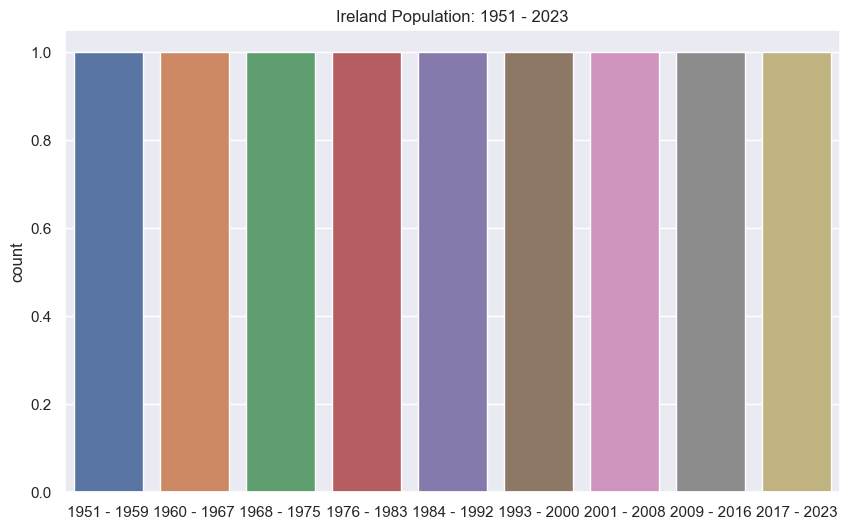

In [566]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
year = ["1951 - 1959", "1960 - 1967", "1968 - 1975", "1976 - 1983", "1984 - 1992", "1993 - 2000", "2001 - 2008", "2009 - 2016", "2017 - 2023"]

plt.figure(figsize=(10, 6))
sns.countplot(x= year, data=pop_df)
plt.title('Ireland Population: 1951 - 2023')
plt.show()


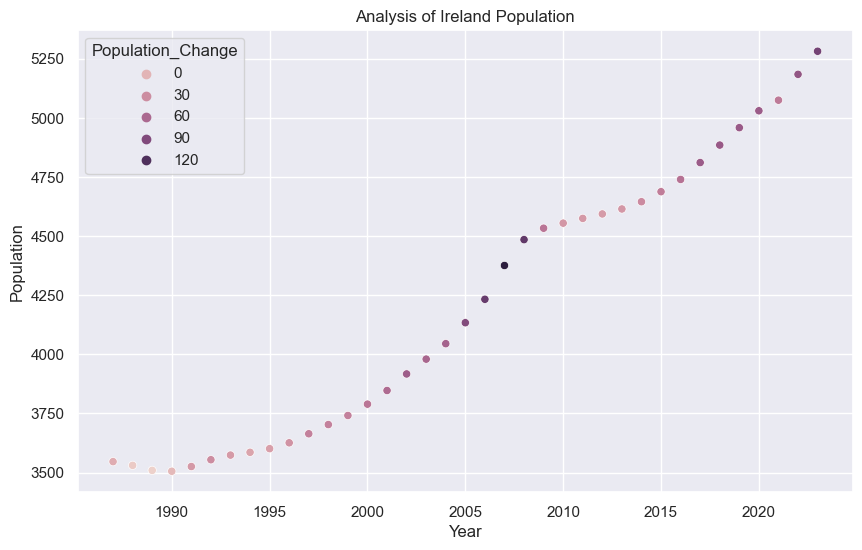

In [570]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pop_df["Year"], y=pop_df["Population"], hue=pop_df["Population_Change"])
plt.title("Analysis of Ireland Population")
plt.show()


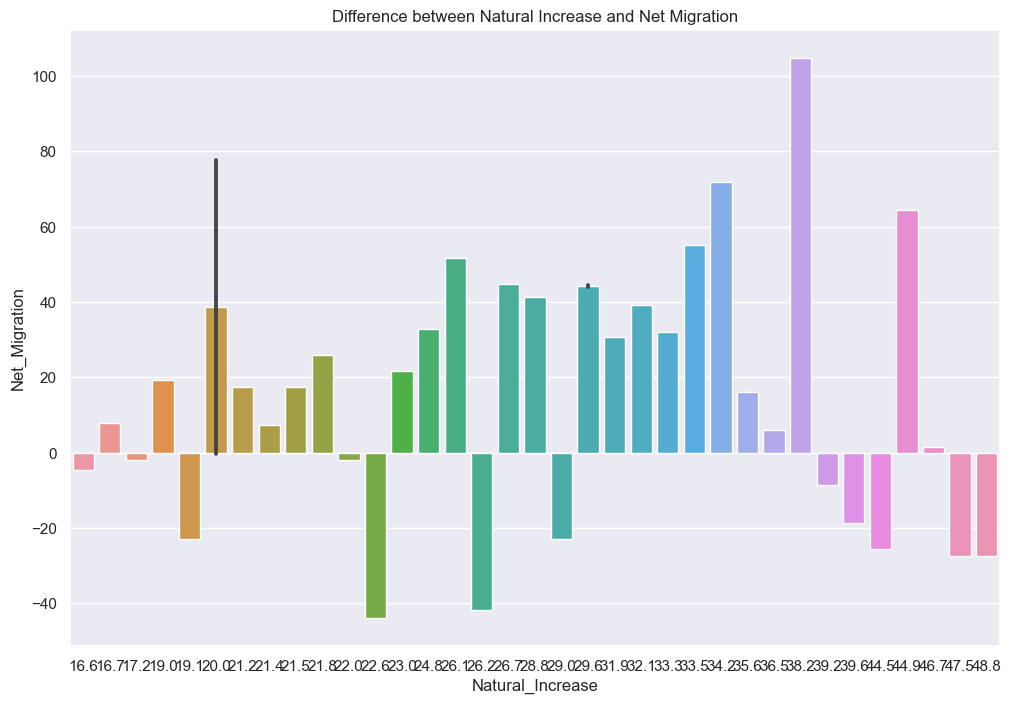

In [572]:
plt.figure(figsize=(12, 8))
sns.barplot(x= "Natural_Increase", y= "Net_Migration", data= pop_df)
plt.title("Difference between Natural Increase and Net Migration")
plt.show()

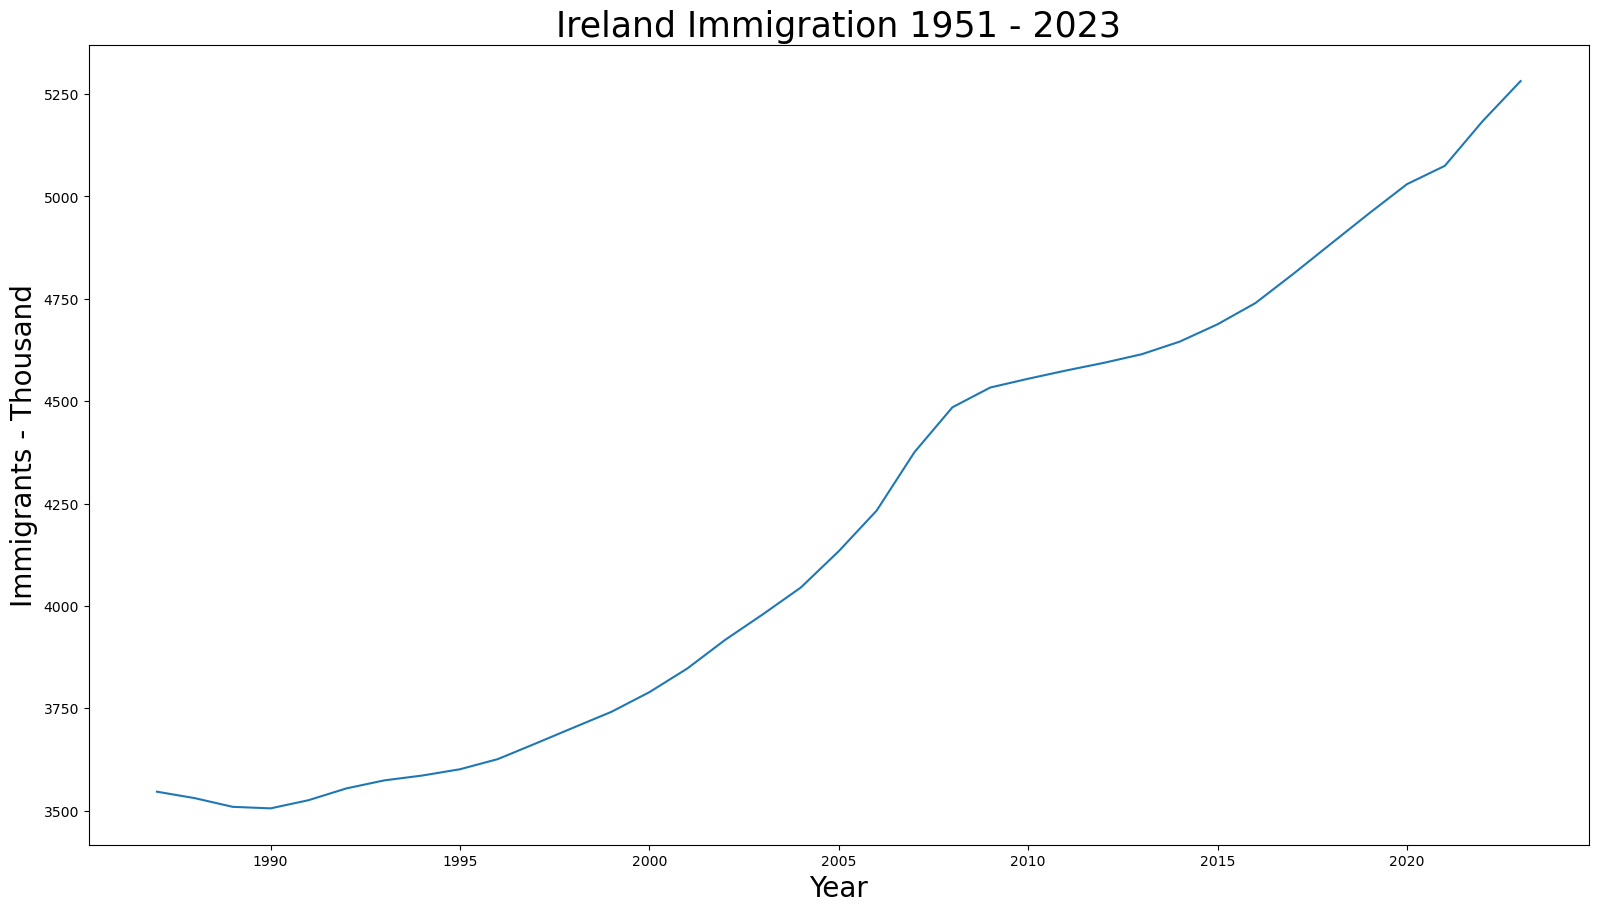

In [469]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1 ])
eixo.plot(pop_df['Year'], pop_df['Population'])

eixo.set_title('Ireland Immigration 1951 - 2023', fontsize=25)
eixo.set_ylabel('Immigrants - Thousand', fontsize=20)
eixo.set_xlabel('Year', fontsize=20)
plt.show()

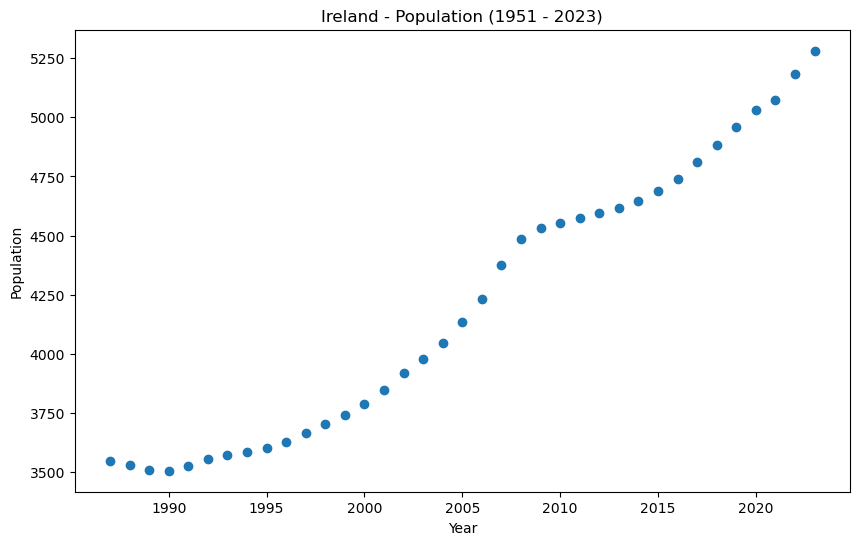

In [470]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(pop_df["Year"], pop_df["Population"])
ax.set_xlabel("Year")
ax.set_ylabel("Population")
plt.title("Ireland - Population (1951 - 2023)")
plt.show()

/var/folders/8c/dwd314qn6rb95b_dklnz6d4m0000gn/T/ipykernel_14890/3174811856.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= pop_df.corr()


,Year,Population,Births,Deaths,Natural_Increase,Immigrants,Emigrants,Net_Migration,Population_Change
Year,1.000000,0.982761,0.533669,-0.006886,0.458227,0.758625,0.478027,0.459206,0.565261
Population,0.982761,1.000000,0.583659,0.017885,0.496075,0.756442,0.570358,0.407954,0.525546
Births,0.533669,0.583659,1.000000,-0.626709,0.986711,0.362522,0.672345,-0.017632,0.242675
Deaths,-0.006886,0.017885,-0.626709,1.000000,-0.744942,-0.094126,-0.116197,-0.026238,-0.221494
Natural_Increase,0.458227,0.496075,0.986711,-0.744942,1.000000,0.329415,0.601063,-0.010817,0.252766
Immigrants,0.758625,0.756442,0.362522,-0.094126,0.329415,1.000000,0.170027,0.850820,0.910055
Emigrants,0.478027,0.570358,0.672345,-0.116197,0.601063,0.170027,1.000000,-0.373141,-0.202643
Net_Migration,0.459206,0.407954,-0.017632,-0.026238,-0.010817,0.850820,-0.373141,1.000000,0.964735
Population_Change,0.565261,0.525546,0.242675,-0.221494,0.252766,0.910055,-0.202643,0.964735,1.000000


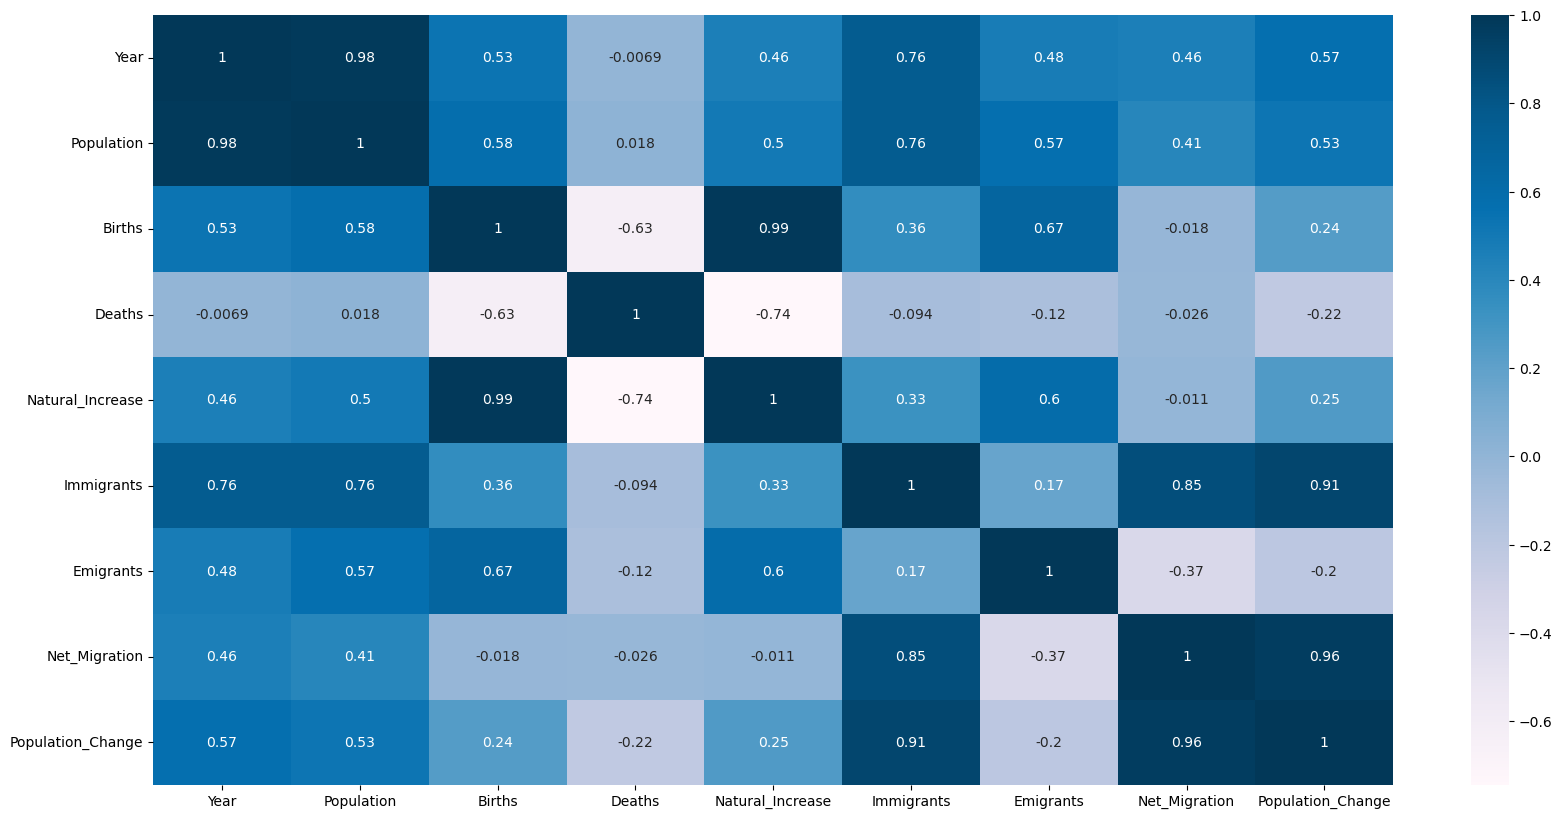

In [471]:
plt.figure(figsize=(20,10))
c= pop_df.corr()
sns.heatmap(c,cmap="PuBu",annot=True)
c
#cmap = colour palette

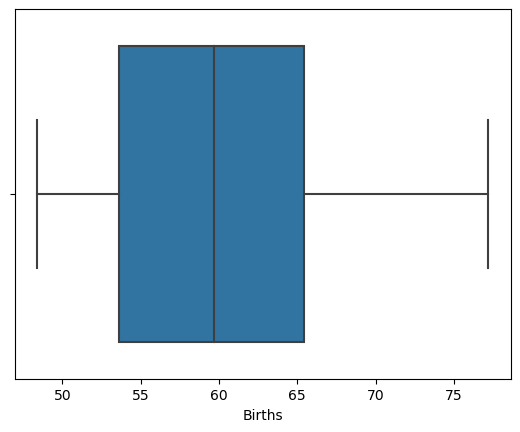

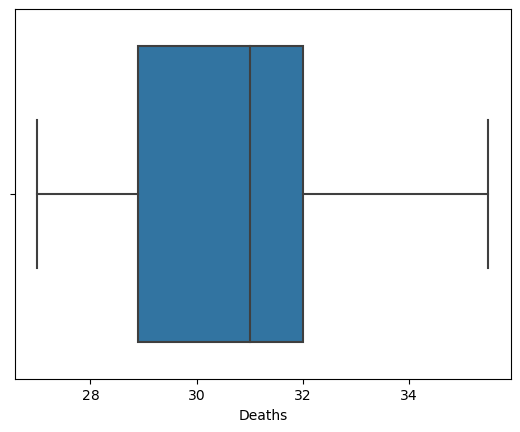

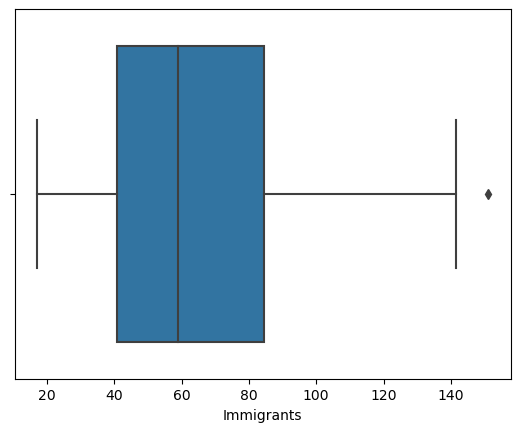

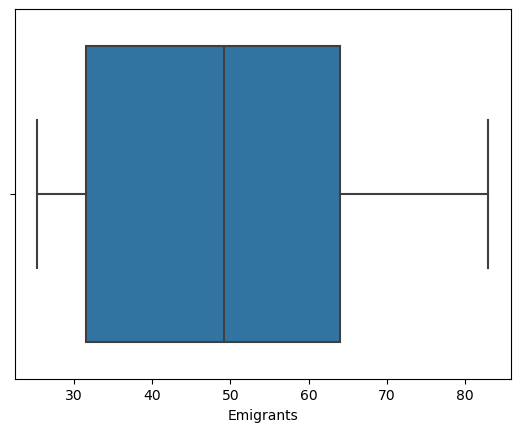

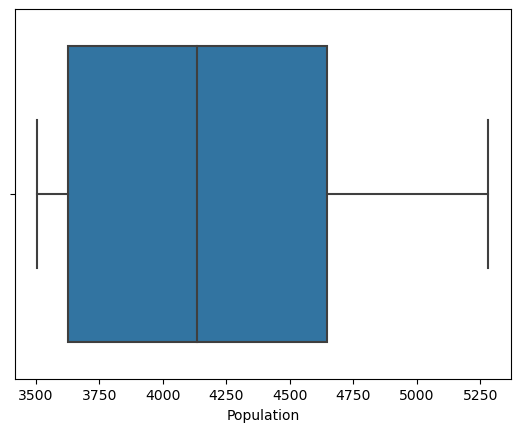

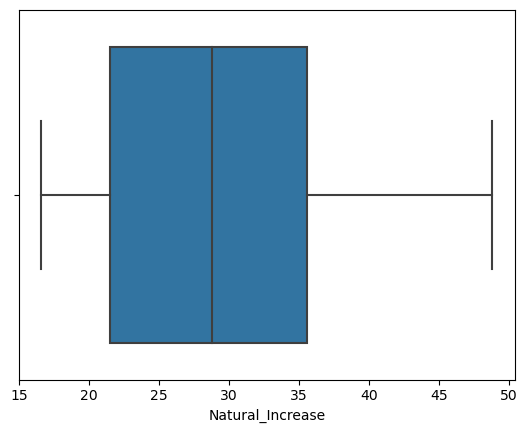

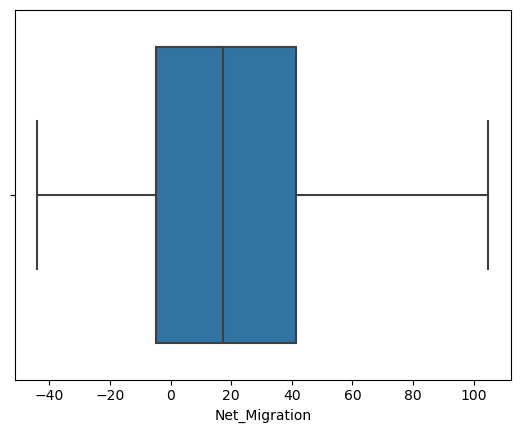

In [472]:
sns.boxplot(x=pop_df['Births'])
plt.show()
sns.boxplot(x=pop_df['Deaths'])
plt.show()
sns.boxplot(x=pop_df['Immigrants'])
plt.show()
sns.boxplot(x=pop_df['Emigrants'])
plt.show()
sns.boxplot(x=pop_df['Population'])
plt.show()
sns.boxplot(x=pop_df['Natural_Increase'])
plt.show()
sns.boxplot(x=pop_df['Net_Migration'])
plt.show()

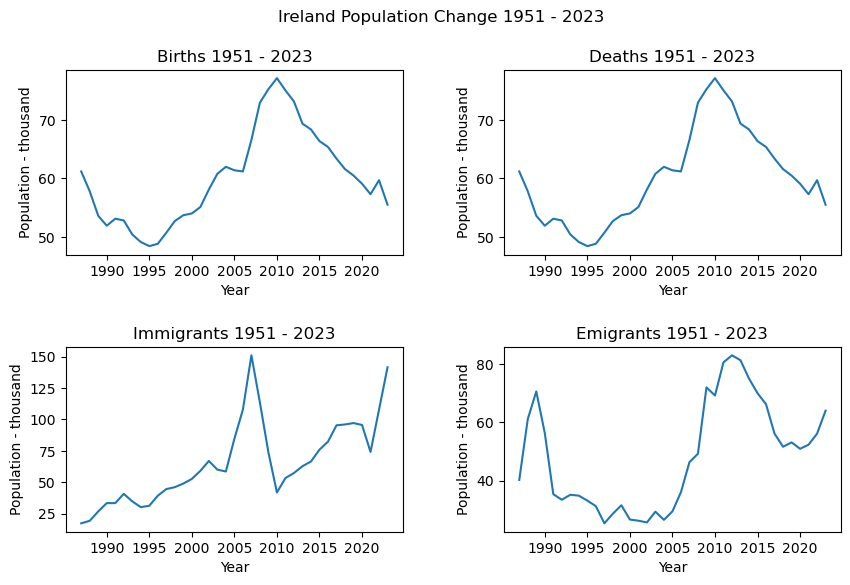

In [473]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Ireland Population Change 1951 - 2023')


axs[0,0].plot(pop_df['Year'], pop_df['Births'])
axs[0,0].set_title('Births 1951 - 2023')

axs[0,1].plot(pop_df['Year'], pop_df['Births'])
axs[0,1].set_title('Deaths 1951 - 2023')

axs[1,0].plot(pop_df['Year'], pop_df['Immigrants'])
axs[1,0].set_title('Immigrants 1951 - 2023')

axs[1,1].plot(pop_df['Year'], pop_df['Emigrants'])
axs[1,1].set_title('Emigrants 1951 - 2023')

for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))

for ax in axs.flat:
  ax.set_xlabel('Year')
  ax.set_ylabel('Population - thousand')

plt.show()

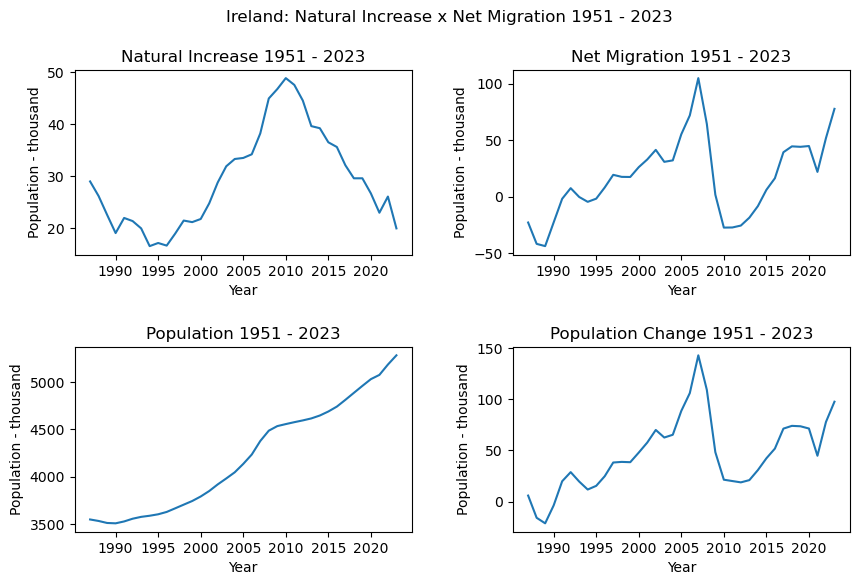

In [474]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Ireland: Natural Increase x Net Migration 1951 - 2023')


axs[0,0].plot(pop_df['Year'], pop_df['Natural_Increase'])
axs[0,0].set_title('Natural Increase 1951 - 2023')

axs[0,1].plot(pop_df['Year'], pop_df['Net_Migration'])
axs[0,1].set_title('Net Migration 1951 - 2023')

axs[1,0].plot(pop_df['Year'], pop_df['Population'])
axs[1,0].set_title('Population 1951 - 2023')

axs[1,1].plot(pop_df['Year'], pop_df['Population_Change'])
axs[1,1].set_title('Population Change 1951 - 2023')

for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))

for ax in axs.flat:
  ax.set_xlabel('Year')
  ax.set_ylabel('Population - thousand')

plt.show()

In [475]:
pop_df.shape[0]

37

In [476]:
mean_pop = pop_df["Population"].mean()
print(mean_pop)

4206.608108108108


In [477]:
mean_births = pop_df["Births"].mean()
print(mean_births)

60.105405405405406


In [478]:
mean_deaths = pop_df["Deaths"].mean()
print(mean_deaths)

30.651351351351348


In [479]:
mean_nat_increase = pop_df["Natural_Increase"].mean()
print(mean_nat_increase)

29.443243243243245


In [480]:
mean_immigrants = pop_df["Immigrants"].mean()
print(mean_immigrants)

65.4054054054054


In [481]:
mean_emigrants = pop_df["Emigrants"].mean()
print(mean_emigrants)

48.45945945945945


In [482]:
mean_net_migration = pop_df["Net_Migration"].mean()
print(mean_net_migration)

16.93783783783784


In [483]:
mean_pop_change = pop_df["Population_Change"].mean()
print(mean_pop_change)

46.38378378378378


In [484]:
mean_native_total = pop_df.groupby("Population").mean()["Natural_Increase"]
mean_native_total.head()
print(mean_native_total)

Population
3505.8    19.1
3509.5    22.6
3525.7    22.0
3530.7    26.2
3546.5    29.0
3554.5    21.4
3574.1    20.0
3585.9    16.6
3601.3    17.2
3626.1    16.7
3664.3    19.0
3703.1    21.5
3741.6    21.2
3789.5    21.8
3847.2    24.8
3917.2    28.8
3979.9    31.9
4045.2    33.3
4133.8    33.5
4232.9    34.2
4375.8    38.2
4485.1    44.9
4533.4    46.7
4554.8    48.8
4574.9    47.5
4593.7    44.5
4614.7    39.6
4645.4    39.2
4687.8    36.5
4739.6    35.6
4810.9    32.1
4884.9    29.6
4958.5    29.6
5029.9    26.7
5074.7    23.0
5184.0    26.1
5281.6    20.0
Name: Natural_Increase, dtype: float64


/var/folders/8c/dwd314qn6rb95b_dklnz6d4m0000gn/T/ipykernel_14890/808266843.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_native_total = pop_df.groupby("Population").mean()["Natural_Increase"]


In [485]:
len(mean_native_total)

37

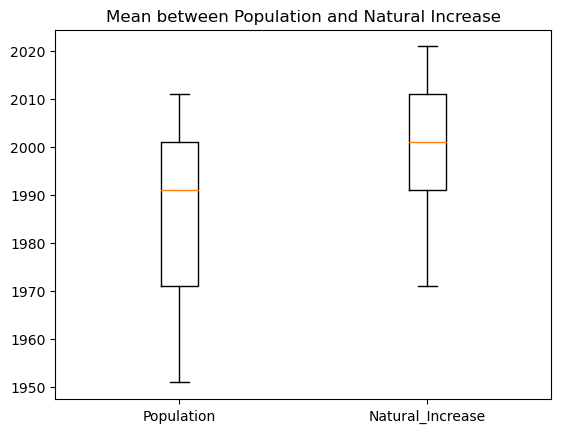

In [486]:
mean_pop = [1951, 1971, 1991, 2001, 2011]  
mean_nat_increase = [1971, 1991, 2001, 2011, 2021]  

plt.boxplot([mean_pop, mean_nat_increase], labels=["Population", "Natural_Increase"])
plt.title("Mean between Population and Natural Increase")
plt.show()

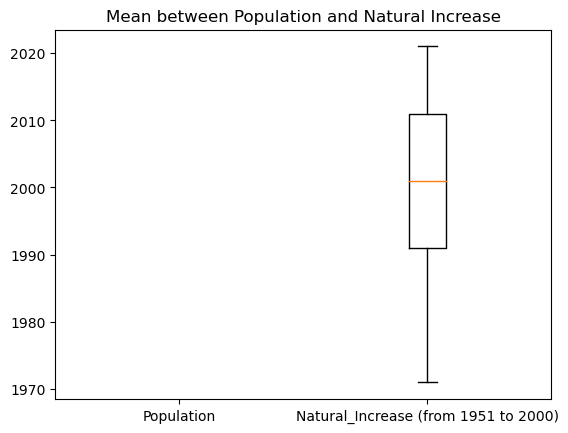

In [487]:
mean_pop = [1951, 1971, 1991, 2001, 2011]  
mean_nat_increase = [1971, 1991, 2001, 2011, 2021]  

plt.boxplot([mean_pop[1951: 2000], mean_nat_increase], labels=["Population", "Natural_Increase (from 1951 to 2000)"])
plt.title("Mean between Population and Natural Increase")
plt.show()

In [488]:
mean_migration_total = pop_df.groupby("Population_Change").mean()["Net_Migration"]
mean_migration_total.head()
print(mean_migration_total)

Population_Change
-21.2     -43.9
-15.8     -41.9
-3.7      -22.9
 5.9      -23.0
 11.8      -4.7
 15.4      -1.9
 18.8     -25.7
 19.6      -0.4
 19.9      -2.0
 20.1     -27.4
 21.0     -18.7
 21.4     -27.5
 24.8       8.0
 28.8       7.4
 30.8      -8.5
 38.2      19.2
 38.5      17.3
 38.8      17.4
 42.3       5.9
 44.8      21.8
 47.9      26.0
 48.3       1.6
 51.8      16.2
 57.7      32.8
 62.6      30.7
 65.3      32.0
 70.0      41.3
 71.3      39.2
 71.4      44.7
 73.6      44.0
 74.0      44.4
 77.8      51.7
 88.6      55.1
 97.6      77.6
 106.0     71.8
 109.2     64.3
 142.9    104.8
Name: Net_Migration, dtype: float64


/var/folders/8c/dwd314qn6rb95b_dklnz6d4m0000gn/T/ipykernel_14890/2182256194.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_migration_total = pop_df.groupby("Population_Change").mean()["Net_Migration"]


In [489]:
len(mean_migration_total)

37

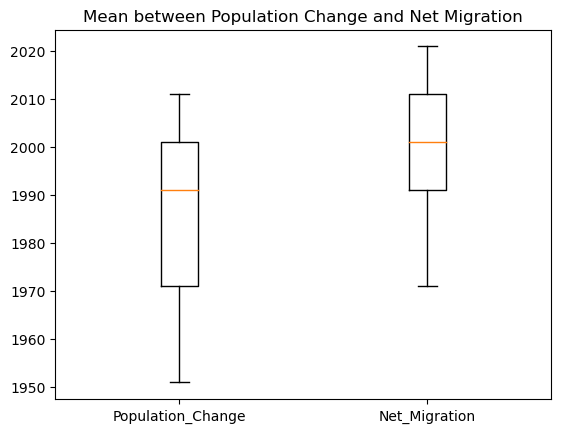

In [490]:
mean_pop_change = [1951, 1971, 1991, 2001, 2011]  
mean_net_migration = [1971, 1991, 2001, 2011, 2021]  

plt.boxplot([mean_pop, mean_net_migration], labels=["Population_Change", "Net_Migration"])
plt.title("Mean between Population Change and Net Migration")
plt.show()

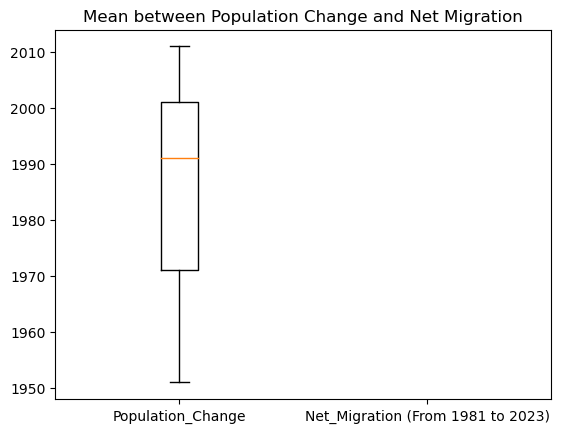

In [491]:
mean_pop_change = [1951, 1971, 1991, 2001, 2011]  
mean_net_migration = [1971, 1991, 2001, 2011, 2021]  

plt.boxplot([mean_pop, mean_net_migration[1981 : 2023]], labels=["Population_Change", "Net_Migration (From 1981 to 2023)"])
plt.title("Mean between Population Change and Net Migration")
plt.show()

In [492]:
mean_ireland_total = pop_df.groupby("Population").mean()["Population_Change"]
mean_ireland_total.head()
print(mean_ireland_total)

Population
3505.8     -3.7
3509.5    -21.2
3525.7     19.9
3530.7    -15.8
3546.5      5.9
3554.5     28.8
3574.1     19.6
3585.9     11.8
3601.3     15.4
3626.1     24.8
3664.3     38.2
3703.1     38.8
3741.6     38.5
3789.5     47.9
3847.2     57.7
3917.2     70.0
3979.9     62.6
4045.2     65.3
4133.8     88.6
4232.9    106.0
4375.8    142.9
4485.1    109.2
4533.4     48.3
4554.8     21.4
4574.9     20.1
4593.7     18.8
4614.7     21.0
4645.4     30.8
4687.8     42.3
4739.6     51.8
4810.9     71.3
4884.9     74.0
4958.5     73.6
5029.9     71.4
5074.7     44.8
5184.0     77.8
5281.6     97.6
Name: Population_Change, dtype: float64


/var/folders/8c/dwd314qn6rb95b_dklnz6d4m0000gn/T/ipykernel_14890/2411621611.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_ireland_total = pop_df.groupby("Population").mean()["Population_Change"]


In [493]:
len(mean_ireland_total)

37

In [494]:
mean_net_migration_total = pop_df.groupby("Emigrants").mean()["Immigrants"]
mean_net_migration_total.head()
print(mean_net_migration_total)

Emigrants
25.3     44.50
25.6     66.90
26.2     59.00
26.5     58.50
26.6     52.60
28.6     46.00
29.3     60.00
29.4     84.60
31.2     39.20
31.5     48.90
33.1     31.20
33.4     40.70
34.8     30.10
35.1     34.70
35.3     33.30
36.0    107.80
40.2     17.20
46.3    151.10
49.2    113.50
50.9     95.60
51.6     96.00
52.3     74.10
53.1     97.10
56.1    101.55
56.3     33.30
61.1     19.20
64.0    141.60
66.2     82.30
69.2     41.80
70.0     75.90
70.6     26.70
72.0     73.70
75.0     66.50
80.6     53.30
81.3     62.70
83.0     57.30
Name: Immigrants, dtype: float64


/var/folders/8c/dwd314qn6rb95b_dklnz6d4m0000gn/T/ipykernel_14890/716849623.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_net_migration_total = pop_df.groupby("Emigrants").mean()["Immigrants"]


In [495]:
len(mean_ireland_total)

37

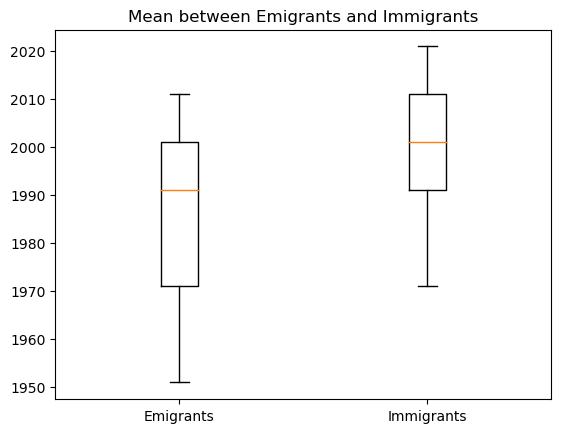

In [496]:
mean_emigrants = [1951, 1971, 1991, 2001, 2011]  
mean_immigrants = [1971, 1991, 2001, 2011, 2021]  

plt.boxplot([mean_emigrants, mean_immigrants], labels=["Emigrants", "Immigrants"])
plt.title("Mean between Emigrants and Immigrants")
plt.show()

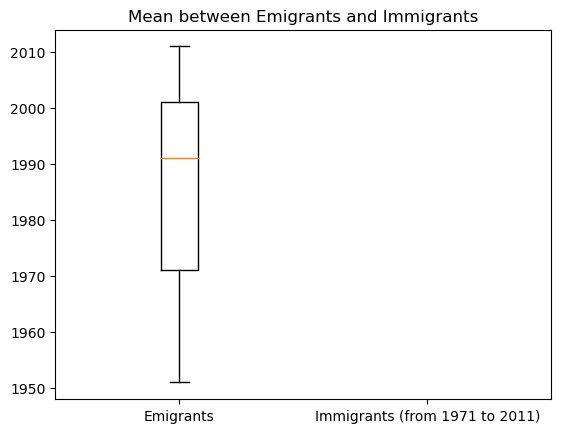

In [497]:
mean_emigrants = [1951, 1971, 1991, 2001, 2011]  
mean_immigrants = [1971, 1991, 2001, 2011, 2021]  

plt.boxplot([mean_emigrants, mean_immigrants[1971:2011]], labels=["Emigrants", "Immigrants (from 1971 to 2011)"])
plt.title("Mean between Emigrants and Immigrants")
plt.show()

In [498]:
median_pop = pop_df["Population"].median()
print(median_pop)

4133.8


In [499]:
median_births = pop_df["Births"].median()
print(median_births)

59.7


In [500]:
median_deaths = pop_df["Deaths"].median()
print(median_deaths)

31.0


In [501]:
median_nat_increase = pop_df["Natural_Increase"].median()
print(median_nat_increase)

28.8


In [502]:
median_immigrants = pop_df["Immigrants"].median()
print(median_immigrants)

59.0


In [503]:
median_emigrants = pop_df["Emigrants"].median()
print(median_emigrants)

49.2


In [504]:
median_net_migration = pop_df["Net_Migration"].median()
print(median_net_migration)

17.3


In [505]:
median_pop_change = pop_df["Population_Change"].median()
print(median_pop_change)

42.3


In [506]:
median_native_total = pop_df.groupby("Population").median()["Natural_Increase"]
median_native_total.head()
print(median_native_total)

Population
3505.8    19.1
3509.5    22.6
3525.7    22.0
3530.7    26.2
3546.5    29.0
3554.5    21.4
3574.1    20.0
3585.9    16.6
3601.3    17.2
3626.1    16.7
3664.3    19.0
3703.1    21.5
3741.6    21.2
3789.5    21.8
3847.2    24.8
3917.2    28.8
3979.9    31.9
4045.2    33.3
4133.8    33.5
4232.9    34.2
4375.8    38.2
4485.1    44.9
4533.4    46.7
4554.8    48.8
4574.9    47.5
4593.7    44.5
4614.7    39.6
4645.4    39.2
4687.8    36.5
4739.6    35.6
4810.9    32.1
4884.9    29.6
4958.5    29.6
5029.9    26.7
5074.7    23.0
5184.0    26.1
5281.6    20.0
Name: Natural_Increase, dtype: float64


/var/folders/8c/dwd314qn6rb95b_dklnz6d4m0000gn/T/ipykernel_14890/2846242465.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_native_total = pop_df.groupby("Population").median()["Natural_Increase"]


In [507]:
median_migration_total = pop_df.groupby("Population_Change").median()["Net_Migration"]
median_migration_total.head()
print(median_migration_total)

Population_Change
-21.2     -43.9
-15.8     -41.9
-3.7      -22.9
 5.9      -23.0
 11.8      -4.7
 15.4      -1.9
 18.8     -25.7
 19.6      -0.4
 19.9      -2.0
 20.1     -27.4
 21.0     -18.7
 21.4     -27.5
 24.8       8.0
 28.8       7.4
 30.8      -8.5
 38.2      19.2
 38.5      17.3
 38.8      17.4
 42.3       5.9
 44.8      21.8
 47.9      26.0
 48.3       1.6
 51.8      16.2
 57.7      32.8
 62.6      30.7
 65.3      32.0
 70.0      41.3
 71.3      39.2
 71.4      44.7
 73.6      44.0
 74.0      44.4
 77.8      51.7
 88.6      55.1
 97.6      77.6
 106.0     71.8
 109.2     64.3
 142.9    104.8
Name: Net_Migration, dtype: float64


/var/folders/8c/dwd314qn6rb95b_dklnz6d4m0000gn/T/ipykernel_14890/2915051350.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_migration_total = pop_df.groupby("Population_Change").median()["Net_Migration"]


In [508]:
median_ireland_total = pop_df.groupby("Population").median()["Population_Change"]
median_ireland_total.head()
print(median_ireland_total)

Population
3505.8     -3.7
3509.5    -21.2
3525.7     19.9
3530.7    -15.8
3546.5      5.9
3554.5     28.8
3574.1     19.6
3585.9     11.8
3601.3     15.4
3626.1     24.8
3664.3     38.2
3703.1     38.8
3741.6     38.5
3789.5     47.9
3847.2     57.7
3917.2     70.0
3979.9     62.6
4045.2     65.3
4133.8     88.6
4232.9    106.0
4375.8    142.9
4485.1    109.2
4533.4     48.3
4554.8     21.4
4574.9     20.1
4593.7     18.8
4614.7     21.0
4645.4     30.8
4687.8     42.3
4739.6     51.8
4810.9     71.3
4884.9     74.0
4958.5     73.6
5029.9     71.4
5074.7     44.8
5184.0     77.8
5281.6     97.6
Name: Population_Change, dtype: float64


/var/folders/8c/dwd314qn6rb95b_dklnz6d4m0000gn/T/ipykernel_14890/3448634341.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_ireland_total = pop_df.groupby("Population").median()["Population_Change"]


In [509]:
median_net_migration_total = pop_df.groupby("Emigrants").median()["Immigrants"]
median_net_migration_total.head()
print(median_net_migration_total)

Emigrants
25.3     44.50
25.6     66.90
26.2     59.00
26.5     58.50
26.6     52.60
28.6     46.00
29.3     60.00
29.4     84.60
31.2     39.20
31.5     48.90
33.1     31.20
33.4     40.70
34.8     30.10
35.1     34.70
35.3     33.30
36.0    107.80
40.2     17.20
46.3    151.10
49.2    113.50
50.9     95.60
51.6     96.00
52.3     74.10
53.1     97.10
56.1    101.55
56.3     33.30
61.1     19.20
64.0    141.60
66.2     82.30
69.2     41.80
70.0     75.90
70.6     26.70
72.0     73.70
75.0     66.50
80.6     53.30
81.3     62.70
83.0     57.30
Name: Immigrants, dtype: float64


/var/folders/8c/dwd314qn6rb95b_dklnz6d4m0000gn/T/ipykernel_14890/2071247770.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_net_migration_total = pop_df.groupby("Emigrants").median()["Immigrants"]


In [510]:
mode_pop = pop_df["Population"].mode().values[0]
print(mode_pop)

3505.8


In [511]:
mode_births = pop_df["Births"].mode().values[0]
print(mode_births)

61.2


In [512]:
mode_deaths = pop_df["Deaths"].mode().values[0]
print(mode_deaths)

28.4


In [513]:
mode_nat_increase = pop_df["Natural_Increase"].mode().values[0]
print(mode_nat_increase)

20.0


In [514]:
mode_immigrants = pop_df["Immigrants"].mode().values[0]
print(mode_immigrants)

33.3


In [515]:
mode_emigrants = pop_df["Emigrants"].mode().values[0]
print(mode_emigrants)

56.1


In [516]:
mode_net_migration = pop_df["Net_Migration"].mode().values[0]
print(mode_net_migration)

-43.9


In [517]:
mode_pop_change = pop_df["Population_Change"].mode().values[0]
print(mode_pop_change)

-21.2


In [518]:
data_pop = pop_df["Population"]
mu, std = norm.fit(data_pop)
print(f"Mean: {mu}, Standard Deviation: {std}")

Mean: 4206.608108108108, Standard Deviation: 567.3262236035918


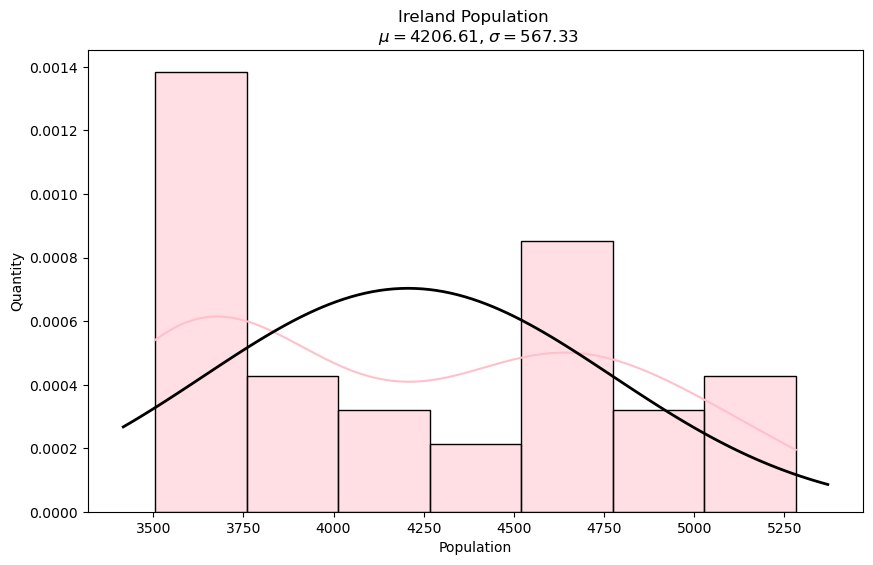

In [519]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

data_pop = pop_df["Population"]

mu, std = norm.fit(data_pop)

plt.figure(figsize=(10, 6))
sns.histplot(data_pop, kde=True, stat='density', color='pink', edgecolor='black')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title(f'Ireland Population \n $\mu={mu:.2f}$, $\sigma={std:.2f}$')
plt.xlabel("Population")
plt.ylabel("Quantity")
plt.show()


In [520]:
data_birth = pop_df["Births"]
mu, std = norm.fit(data_birth)
print(f"Mean: {mu}, Standard Deviation: {std}")

Mean: 60.105405405405406, Standard Deviation: 7.9705181745468465


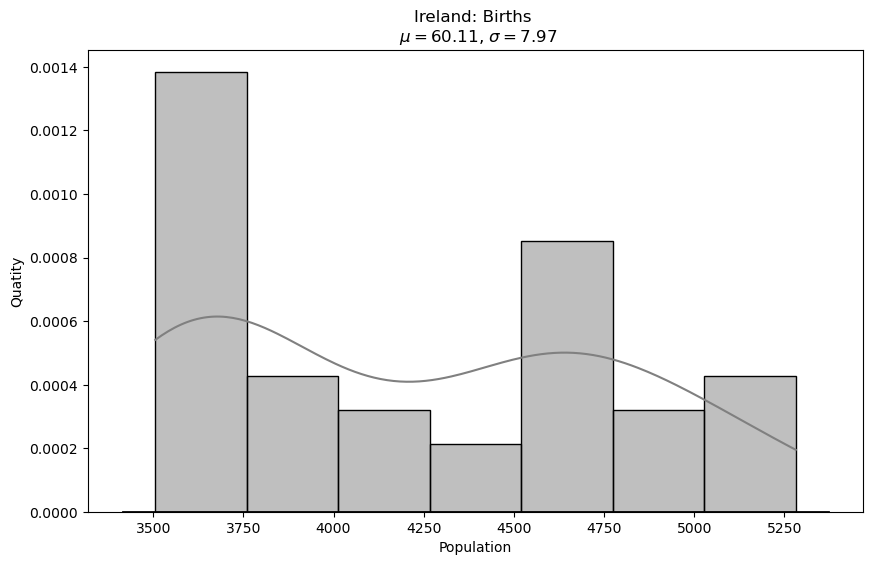

In [521]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

data_birth = pop_df["Births"]

mu, std = norm.fit(data_birth)

plt.figure(figsize=(10, 6))
sns.histplot(data_pop, kde=True, stat='density', color='grey', edgecolor='black')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title(f'Ireland: Births \n $\mu={mu:.2f}$, $\sigma={std:.2f}$')
plt.xlabel("Population")
plt.ylabel("Quatity")
plt.show()

In [522]:
data_death = pop_df["Deaths"]
mu, std = norm.fit(data_death)
print(f"Mean: {mu}, Standard Deviation: {std}")

Mean: 30.651351351351348, Standard Deviation: 1.9481968963178484


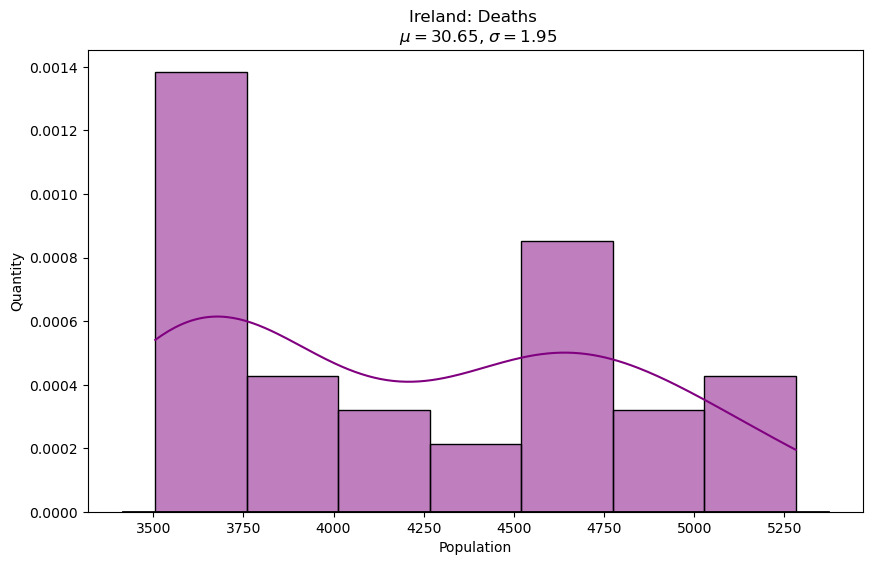

In [523]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

data_death = pop_df["Deaths"]

mu, std = norm.fit(data_death)

plt.figure(figsize=(10, 6))
sns.histplot(data_pop, kde=True, stat='density', color='purple', edgecolor='black')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title(f'Ireland: Deaths \n $\mu={mu:.2f}$, $\sigma={std:.2f}$')
plt.xlabel("Population")
plt.ylabel("Quantity")
plt.show()

In [524]:
data_nat_increase = pop_df["Natural_Increase"]
mu, std = norm.fit(data_nat_increase)
print(f"Mean: {mu}, Standard Deviation: {std}")

Mean: 29.443243243243245, Standard Deviation: 9.321452750149259


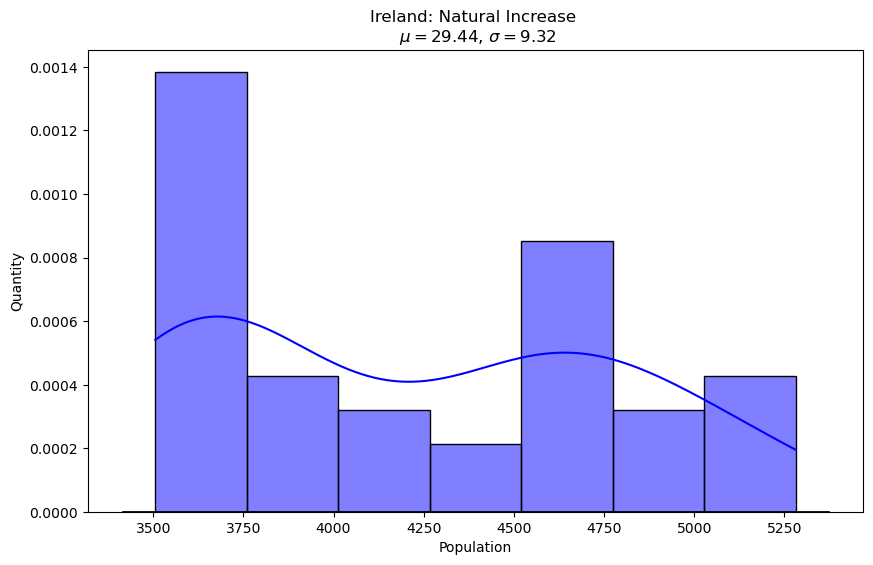

In [525]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

data_nat_increase = pop_df["Natural_Increase"]

mu, std = norm.fit(data_nat_increase)

plt.figure(figsize=(10, 6))
sns.histplot(data_pop, kde=True, stat='density', color='blue', edgecolor='black')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title(f'Ireland: Natural Increase \n $\mu={mu:.2f}$, $\sigma={std:.2f}$')
plt.xlabel("Population")
plt.ylabel("Quantity")
plt.show()

In [526]:
data_immigrant = pop_df["Immigrants"]
mu, std = norm.fit(data_immigrant)
print(f"Mean: {mu}, Standard Deviation: {std}")

Mean: 65.4054054054054, Standard Deviation: 32.271692440027905


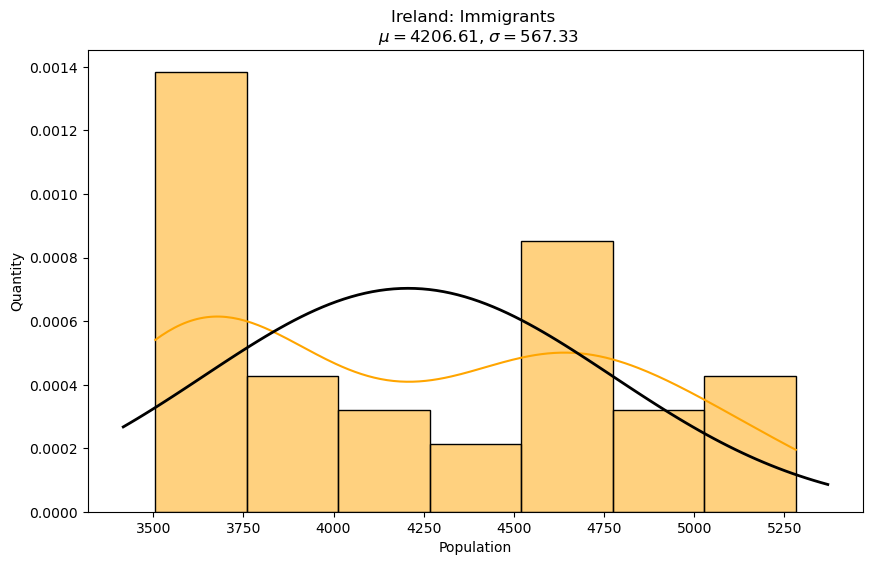

In [527]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

data_immigrant = pop_df["Immigrants"]

mu, std = norm.fit(data_pop)

plt.figure(figsize=(10, 6))
sns.histplot(data_pop, kde=True, stat='density', color='orange', edgecolor='black')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title(f'Ireland: Immigrants \n $\mu={mu:.2f}$, $\sigma={std:.2f}$')
plt.xlabel("Population")
plt.ylabel("Quantity")
plt.show()

In [528]:
data_emigrant = pop_df["Emigrants"]
mu, std = norm.fit(data_emigrant)
print(f"Mean: {mu}, Standard Deviation: {std}")

Mean: 48.45945945945945, Standard Deviation: 18.268381479210962


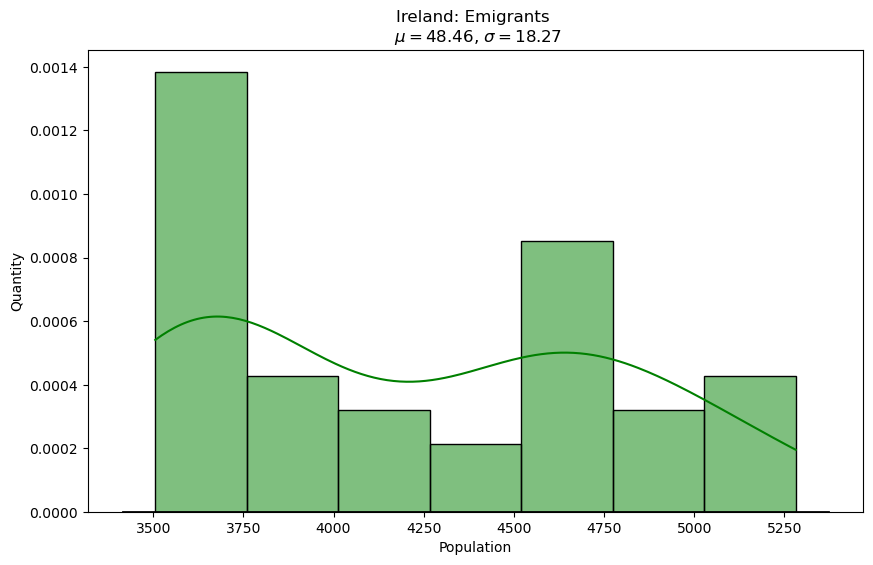

In [529]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

data_emigrant = pop_df["Emigrants"]

mu, std = norm.fit(data_emigrant)

plt.figure(figsize=(10, 6))
sns.histplot(data_pop, kde=True, stat='density', color='green', edgecolor='black')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title(f'Ireland: Emigrants \n $\mu={mu:.2f}$, $\sigma={std:.2f}$')
plt.xlabel("Population")
plt.ylabel("Quantity")
plt.show()

In [530]:
data_net_migration = pop_df["Net_Migration"]
mu, std = norm.fit(data_net_migration)
print(f"Mean: {mu}, Standard Deviation: {std}")

Mean: 16.93783783783784, Standard Deviation: 34.278125964664106


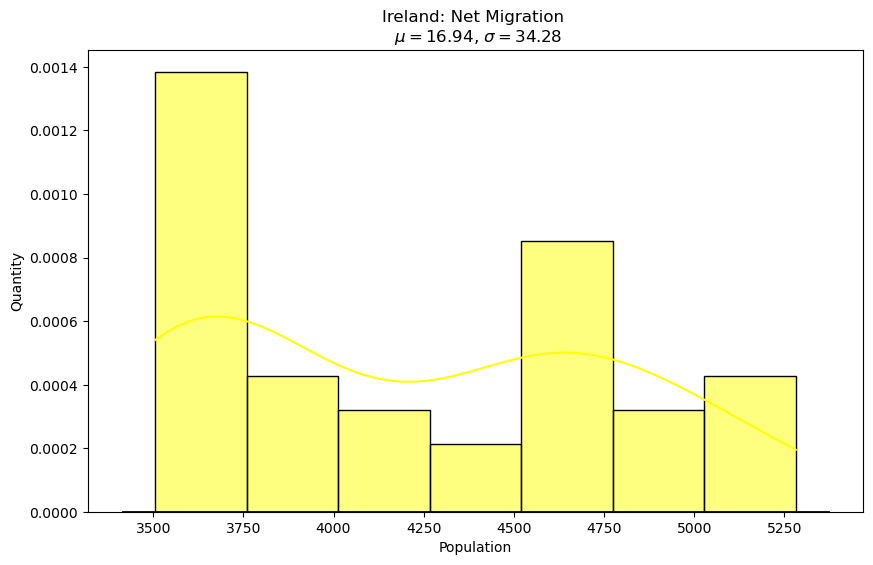

In [531]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

data_net_migration = pop_df["Net_Migration"]

mu, std = norm.fit(data_net_migration)

plt.figure(figsize=(10, 6))
sns.histplot(data_pop, kde=True, stat='density', color='yellow', edgecolor='black')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title(f'Ireland: Net Migration \n $\mu={mu:.2f}$, $\sigma={std:.2f}$')
plt.xlabel("Population")
plt.ylabel("Quantity")
plt.show()

In [532]:
data_pop_change = pop_df["Population_Change"]
mu, std = norm.fit(data_pop_change)
print(f"Mean: {mu}, Standard Deviation: {std}")

Mean: 46.38378378378378, Standard Deviation: 35.41262191773416


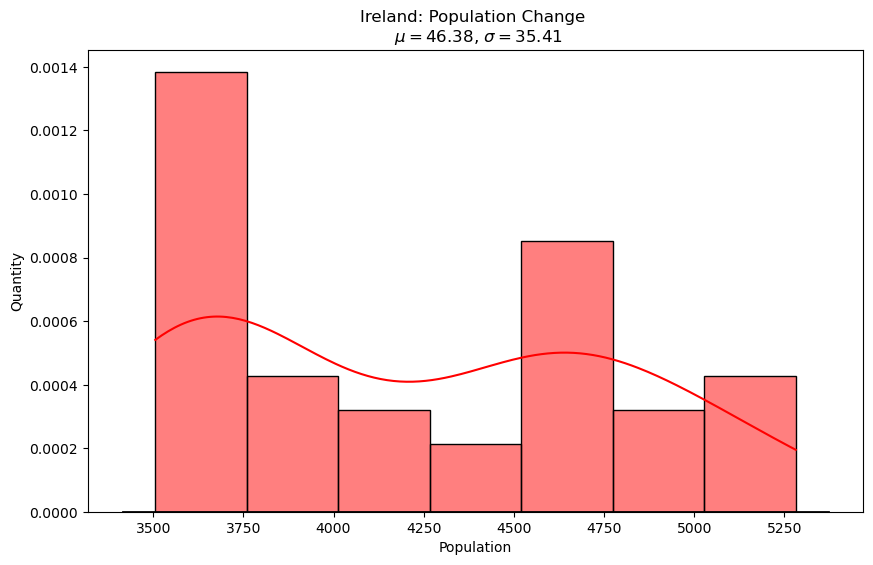

In [533]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

data_pop_change = pop_df["Population_Change"]

mu, std = norm.fit(data_pop_change)

plt.figure(figsize=(10, 6))
sns.histplot(data_pop, kde=True, stat='density', color='red', edgecolor='black')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title(f'Ireland: Population Change \n $\mu={mu:.2f}$, $\sigma={std:.2f}$')
plt.xlabel("Population")
plt.ylabel("Quantity")
plt.show()

In [535]:
summary_stats = pop_df.describe()

In [536]:
correlation_matrix = pop_df.corr()

/var/folders/8c/dwd314qn6rb95b_dklnz6d4m0000gn/T/ipykernel_14890/3358087264.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = pop_df.corr()


<Figure size 1000x800 with 0 Axes>

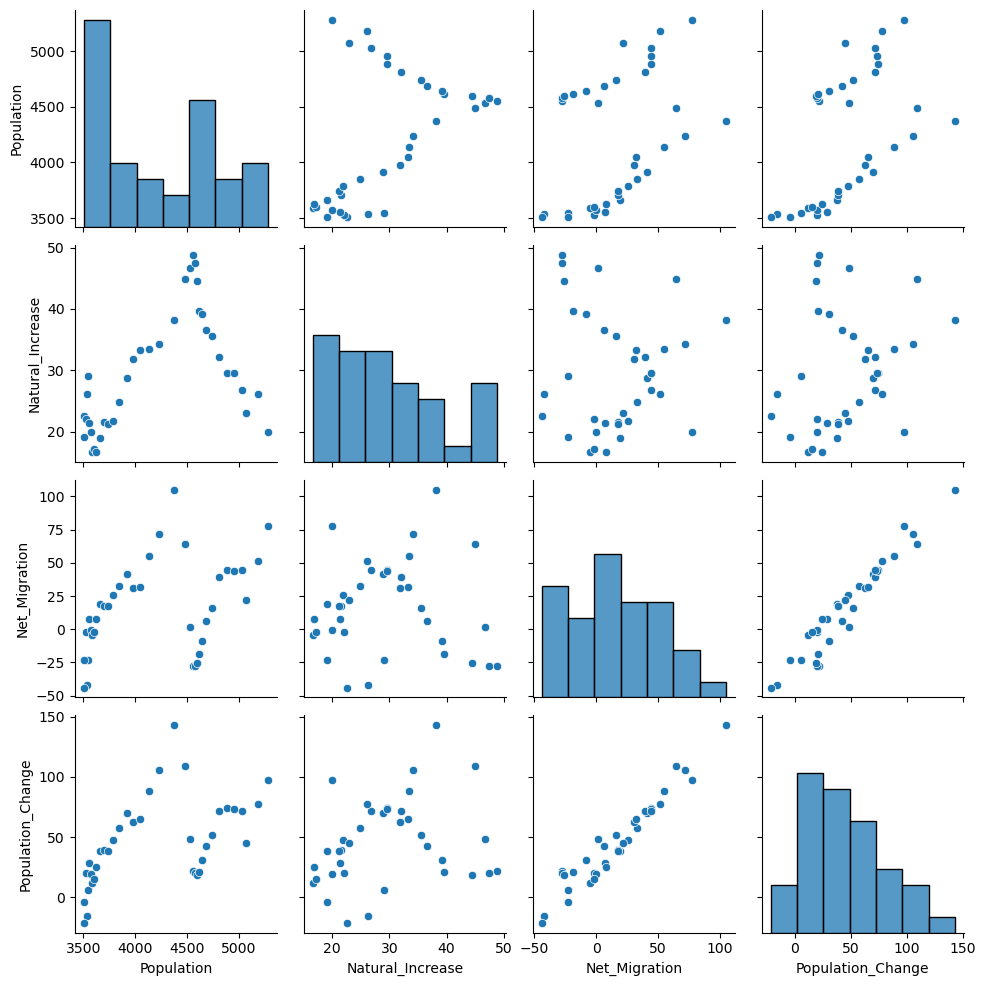

In [542]:
plt.figure(figsize = (10, 8))
sns.pairplot(pop_df[["Population", "Natural_Increase", "Net_Migration", "Population_Change"]])
plt.xlabel("Population")
plt.ylabel("Year")
plt.show()


<Figure size 1000x800 with 0 Axes>

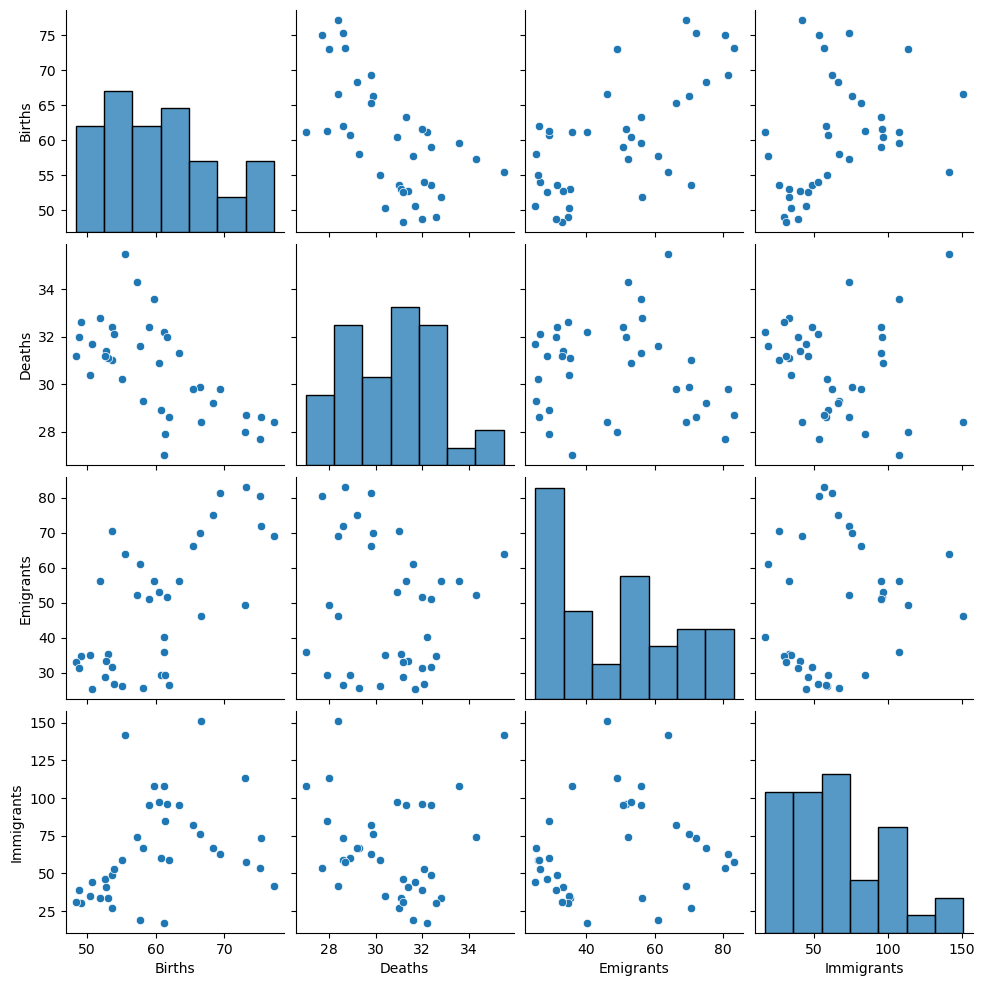

In [544]:
plt.figure(figsize = (10, 8))
sns.pairplot(pop_df[["Births", "Deaths", "Emigrants", "Immigrants"]])
plt.xlabel("Population")
plt.ylabel("Year")
plt.show()

In [545]:
print(summary_stats)

              Year   Population     Births     Deaths  Natural_Increase  \
count    37.000000    37.000000  37.000000  37.000000         37.000000   
mean   2005.000000  4206.608108  60.105405  30.651351         29.443243   
std      10.824355   575.151783   8.080462   1.975070          9.450031   
min    1987.000000  3505.800000  48.400000  27.000000         16.600000   
25%    1996.000000  3626.100000  53.600000  28.900000         21.500000   
50%    2005.000000  4133.800000  59.700000  31.000000         28.800000   
75%    2014.000000  4645.400000  65.400000  32.000000         35.600000   
max    2023.000000  5281.600000  77.200000  35.500000         48.800000   

       Immigrants  Emigrants  Net_Migration  Population_Change  
count   37.000000  37.000000      37.000000          37.000000  
mean    65.405405  48.459459      16.937838          46.383784  
std     32.716840  18.520371      34.750950          35.901095  
min     17.200000  25.300000     -43.900000         -21.200000  